In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
%matplotlib inline

In [30]:
rhpass=pd.read_csv("redhat_passguessing_2-edit.csv", parse_dates=['Time'])
rhpass.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,2011-11-04 21:04:51,10.10.10.5,10.10.10.15,FTP,76,Response: 530 Login incorrect.
1,2,2011-11-04 21:04:51,10.10.10.15,10.10.10.5,TCP,54,"32213 > 21 [FIN, ACK] Seq=1 Ack=23 Win=65459 L..."
2,3,2011-11-04 21:04:51,10.10.10.5,10.10.10.15,FTP,64,Response: 500 OOPS:
3,4,2011-11-04 21:04:51,10.10.10.15,10.10.10.5,TCP,54,"32213 > 21 [RST, ACK] Seq=2 Ack=33 Win=0 Len=0"
4,5,2011-11-04 21:04:51,10.10.10.15,10.10.10.5,TCP,62,32224 > 21 [SYN] Seq=0 Win=65535 Len=0 MSS=146...


In [31]:
rhpass.describe()

,No.,Length
count,18799.000000,18799.000000
mean,9400.000000,65.752221
std,5426.948191,24.349490
min,1.000000,42.000000
25%,4700.500000,60.000000
50%,9400.000000,62.000000
75%,14099.500000,70.000000
max,18799.000000,590.000000


In [32]:
rhpass['Info'].describe()

count                              18799
unique                             11557
top       Response: 530 Login incorrect.
freq                                1436
dtype: object

In [33]:
infodata = rhpass[['Time','Source','Destination','Protocol',
                  'Length','Info']]

In [34]:
infodata.head()

,Time,Source,Destination,Protocol,Length,Info
0,2011-11-04 21:04:51,10.10.10.5,10.10.10.15,FTP,76,Response: 530 Login incorrect.
1,2011-11-04 21:04:51,10.10.10.15,10.10.10.5,TCP,54,"32213 > 21 [FIN, ACK] Seq=1 Ack=23 Win=65459 L..."
2,2011-11-04 21:04:51,10.10.10.5,10.10.10.15,FTP,64,Response: 500 OOPS:
3,2011-11-04 21:04:51,10.10.10.15,10.10.10.5,TCP,54,"32213 > 21 [RST, ACK] Seq=2 Ack=33 Win=0 Len=0"
4,2011-11-04 21:04:51,10.10.10.15,10.10.10.5,TCP,62,32224 > 21 [SYN] Seq=0 Win=65535 Len=0 MSS=146...


In [35]:
category_group=infodata.groupby(['Source','Destination','Protocol']).sum()
category_group.head()

Length
Source      Destination     Protocol        
0.0.0.0     255.255.255.255 DHCP       20060
10.10.10.15 10.10.10.5      FTP       192157
                            TCP       323978
10.10.10.5  10.10.10.15     FTP       437292
                            TCP       261710

In [36]:
category_group.unstack().head()

Length                                  \
Protocol                                ARP  BROWSER   DHCP  DHCPv6     FTP   
Source            Destination                                                 
0.0.0.0           255.255.255.255       NaN      NaN  20060     NaN     NaN   
10.10.10.15       10.10.10.5            NaN      NaN    NaN     NaN  192157   
10.10.10.5        10.10.10.15           NaN      NaN    NaN     NaN  437292   
                  10.10.10.255          NaN      507    NaN     NaN     NaN   
Micro-St_60:f8:09 Tp-LinkT_b5:79:3f      60      NaN    NaN     NaN     NaN   

                                             
Protocol                                TCP  
Source            Destination                
0.0.0.0           255.255.255.255       NaN  
10.10.10.15       10.10.10.5         323978  
10.10.10.5        10.10.10.15        261710  
                  10.10.10.255          NaN  
Micro-St_60:f8:09 Tp-LinkT_b5:79:3f     NaN

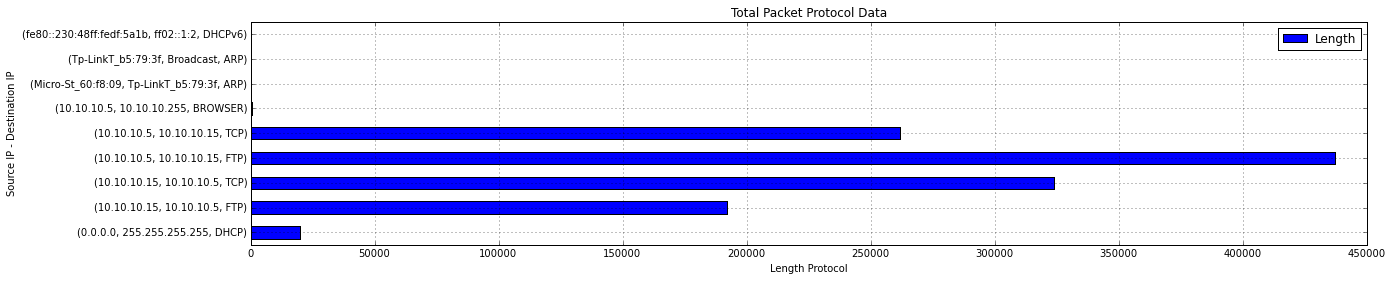

In [37]:
my_plot = category_group.plot(kind='barh',stacked=True,title="Total Packet Protocol Data",figsize=(20,4))
my_plot.set_xlabel("Length Protocol")
my_plot.set_ylabel("Source IP - Destination IP")

In [38]:
fig = my_plot.get_figure()
fig.savefig("total-packet-protocol-data-redhat-passguessing.png")

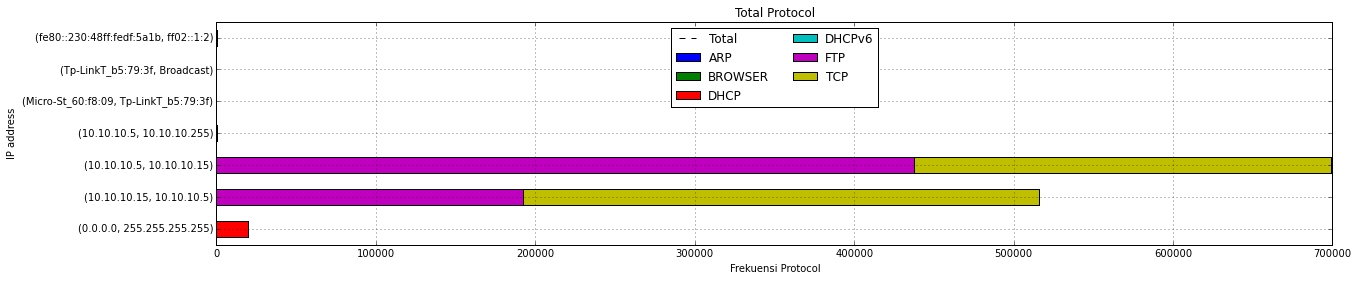

In [39]:
my_plot = category_group.unstack().plot(kind='barh',stacked=True,title="Total Protocol",figsize=(20, 4))
my_plot.set_xlabel("Frekuensi Protocol")
my_plot.set_ylabel("IP address")
my_plot.legend(["Total","ARP","BROWSER","DHCP","DHCPv6","FTP","TCP"], loc=9,ncol=2)

In [40]:
fig = my_plot.get_figure()
fig.savefig("total-protocol-redhat-passguessing.png")

In [41]:
infodata2 = rhpass[['Time','Length','Info']]
infodata2.head()

,Time,Length,Info
0,2011-11-04 21:04:51,76,Response: 530 Login incorrect.
1,2011-11-04 21:04:51,54,"32213 > 21 [FIN, ACK] Seq=1 Ack=23 Win=65459 L..."
2,2011-11-04 21:04:51,64,Response: 500 OOPS:
3,2011-11-04 21:04:51,54,"32213 > 21 [RST, ACK] Seq=2 Ack=33 Win=0 Len=0"
4,2011-11-04 21:04:51,62,32224 > 21 [SYN] Seq=0 Win=65535 Len=0 MSS=146...


In [42]:
infodata2 = infodata2.set_index('Time')
infodata2.head()

,Length,Info
Time,,
2011-11-04 21:04:51,76,Response: 530 Login incorrect.
2011-11-04 21:04:51,54,"32213 > 21 [FIN, ACK] Seq=1 Ack=23 Win=65459 L..."
2011-11-04 21:04:51,64,Response: 500 OOPS:
2011-11-04 21:04:51,54,"32213 > 21 [RST, ACK] Seq=2 Ack=33 Win=0 Len=0"
2011-11-04 21:04:51,62,32224 > 21 [SYN] Seq=0 Win=65535 Len=0 MSS=146...


In [43]:
infodata2.resample('T',how=sum).head()

,Length
Time,
2011-11-04 21:04:00,31107
2011-11-04 21:05:00,219100
2011-11-04 21:06:00,221178
2011-11-04 21:07:00,217005
2011-11-04 21:08:00,218185


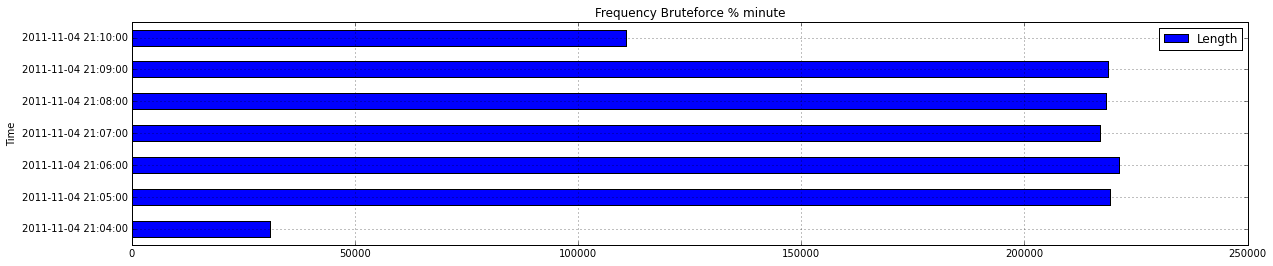

In [44]:
infodata2_plot = infodata2.resample('T',how=sum).plot(kind="barh",title="Frequency Bruteforce % minute",style="r",figsize=(20,4))

In [45]:
fig = infodata2_plot.get_figure()
fig.savefig("total-packet-by-minute.png")

In [46]:
infodata2 = rhpass[['Length','Time']]
infodata2.head()

,Length,Time
0,76,2011-11-04 21:04:51
1,54,2011-11-04 21:04:51
2,64,2011-11-04 21:04:51
3,54,2011-11-04 21:04:51
4,62,2011-11-04 21:04:51


In [47]:
infodata2 = infodata2.set_index('Time')
infodata2.head()

,Length
Time,
2011-11-04 21:04:51,76
2011-11-04 21:04:51,54
2011-11-04 21:04:51,64
2011-11-04 21:04:51,54
2011-11-04 21:04:51,62


In [48]:
infodata2.resample('S',how=sum).head()

,Length
Time,
2011-11-04 21:04:51,4199
2011-11-04 21:04:52,1685
2011-11-04 21:04:53,4984
2011-11-04 21:04:54,3420
2011-11-04 21:04:55,2523


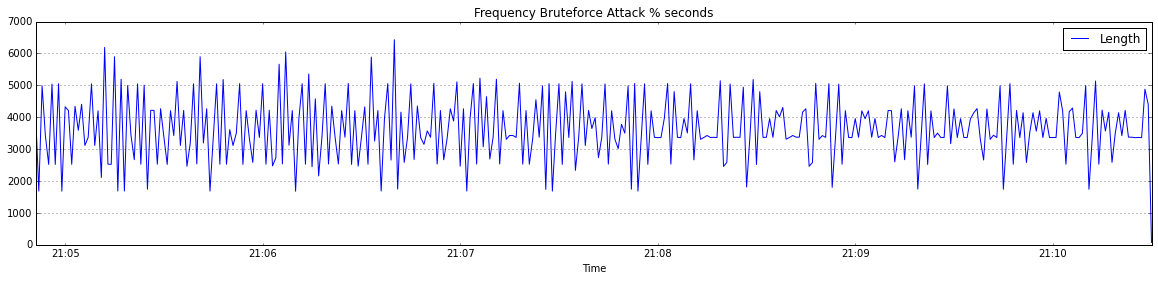

In [49]:
infodata2_plot = infodata2.resample('S',how=sum).plot(title="Frequency Bruteforce Attack % seconds",figsize=(20,4))

In [50]:
fig = infodata2_plot.get_figure()
fig.savefig("total-packet-by-seconds.png")